In [76]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm

#ho importato i dati da yahoo finance di Mediobanca, scaricando i pacchetti che servono per l'analisi

In [77]:
stock = yf.download ('MB.MI',dt.datetime(2024,1,1),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [78]:
ticker = yf.Ticker('MB.MI')
ticker.info
#questa funzione restituisce le informazioni principali sulla stock in questione

{'address1': 'Piazzetta Enrico Cuccia, 1',
 'city': 'Milan',
 'state': 'MI',
 'zip': '20121',
 'country': 'Italy',
 'phone': '39 02 88291',
 'fax': '39 02 8829550',
 'website': 'https://www.mediobanca.com',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Mediobanca Banca di Credito Finanziario S.p.A., together with its subsidiaries, provides various banking products and services in Italy and internationally. The company operates through Wealth Management, Consumer Finance, Corporate and Investment Banking, Insurance - Principal Investing, and Holding Functions segments. The Wealth Management segment offers asset management and management services to private banking and premier customers. The Consumer Finance segment provides a range of consumer credit products comprising personal and special-purpose lo

In [79]:
stock.head()
#questi sono i dati principali della stock, nell'intervallo di tempo che va da inizio 2024 ad oggi

Price,Close,High,Low,Open,Volume
Ticker,MB.MI,MB.MI,MB.MI,MB.MI,MB.MI
Date,,,,,
2024-01-02,10.415574,10.587617,10.378376,10.434174,2266336
2024-01-03,10.336528,10.443473,10.290030,10.396976,2124270
2024-01-04,10.448123,10.448123,10.322579,10.322579,2699800
2024-01-05,10.527170,10.527170,10.364428,10.401626,2215076
2024-01-08,10.555070,10.582969,10.410925,10.485322,2136939


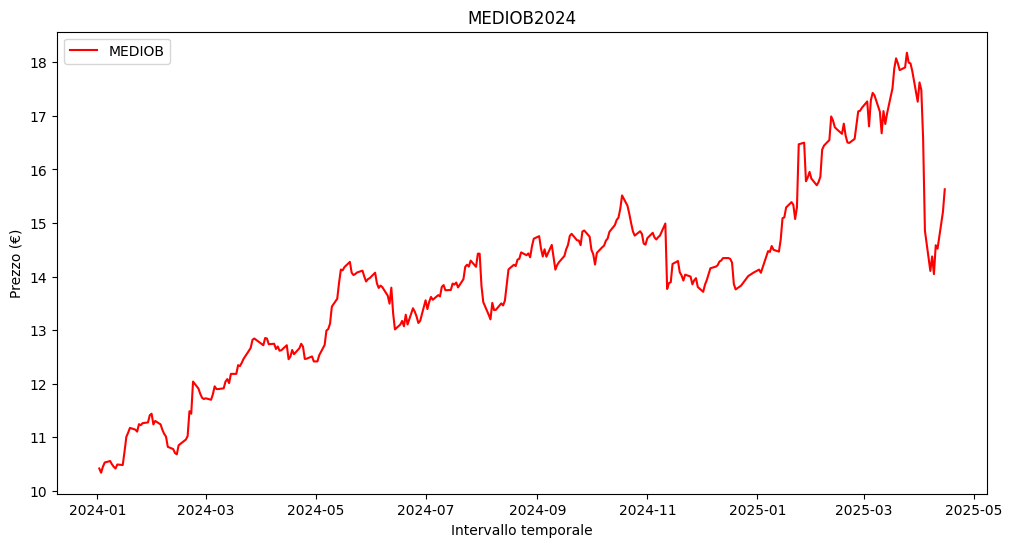

In [80]:
plt.figure(figsize=(12,6))
plt.plot(stock.index, stock['Close'], label='MEDIOB', color='red')
plt.title('MEDIOB2024')
plt.xlabel('Intervallo temporale')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.show()
#grafico di mediobanca in suddetto intervallo temporale

In [81]:
stockCOVID = yf.download ('MB.MI', dt.datetime(2020,1,1,),dt.datetime(2021,12,31))
#qui considero l'azione durante periodo covid, da inizio 2020 a fine 2021

[*********************100%***********************]  1 of 1 completed


In [82]:
stockCOVID.head()

Price,Close,High,Low,Open,Volume
Ticker,MB.MI,MB.MI,MB.MI,MB.MI,MB.MI
Date,,,,,
2020-01-02,7.492301,7.507286,7.346951,7.361936,3353093
2020-01-03,7.427867,7.481812,7.373923,7.481812,2930166
2020-01-06,7.360437,7.384412,7.237563,7.358938,3675716
2020-01-07,7.381415,7.453341,7.355941,7.390406,2171461
2020-01-08,7.448846,7.448846,7.279520,7.319979,3599082


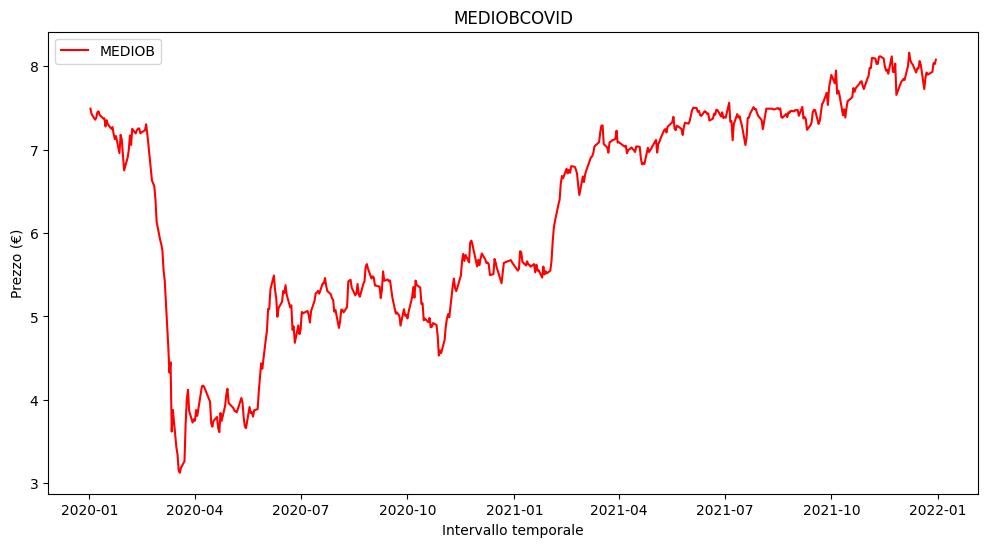

In [83]:
plt.figure(figsize=(12,6))
plt.plot(stockCOVID.index, stockCOVID['Close'], label='MEDIOB', color='red')
plt.title('MEDIOBCOVID')
plt.xlabel('Intervallo temporale')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.show()
#grafico durante il covid

In [84]:
stockCRISI = yf.download ('MB.MI', dt.datetime(2007,1,1,), dt.datetime(2009,12,31))
#qui invece il focus è sulla crisi del 2008

[*********************100%***********************]  1 of 1 completed


In [85]:
stockCRISI.head()

Price,Close,High,Low,Open,Volume
Ticker,MB.MI,MB.MI,MB.MI,MB.MI,MB.MI
Date,,,,,
2007-01-02,8.446986,8.484300,8.386351,8.460978,2471896
2007-01-03,8.512286,8.521614,8.414336,8.470308,3614397
2007-01-04,8.507623,8.516952,8.414338,8.442323,3569441
2007-01-05,8.423665,8.498293,8.414336,8.460978,2126087
2007-01-08,8.432993,8.470307,8.391015,8.470307,2807329


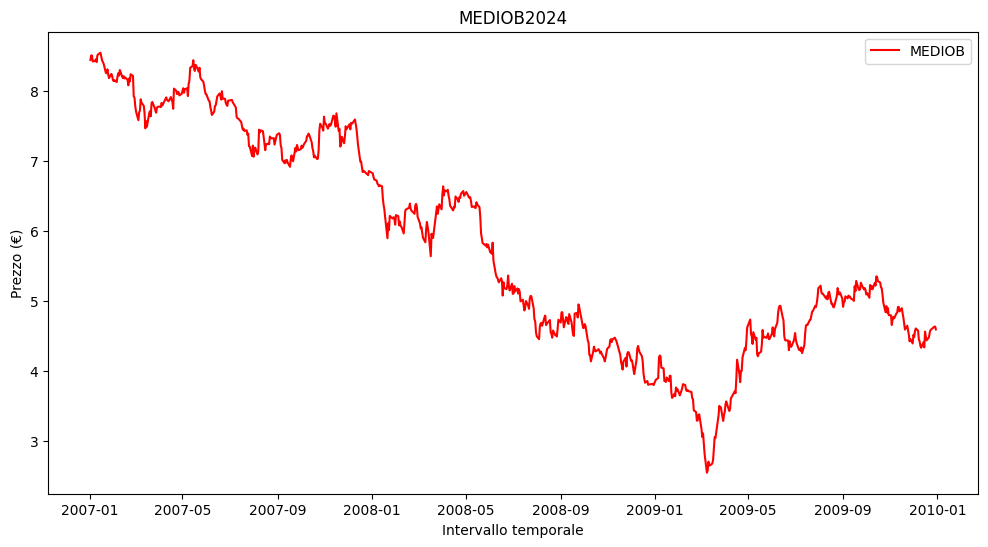

In [86]:
plt.figure(figsize=(12,6))
plt.plot(stockCRISI.index, stockCRISI['Close'], label='MEDIOB', color='red')
plt.title('MEDIOB2024')
plt.xlabel('Intervallo temporale')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.show()
#grafico crisi 2008

In [87]:
close_prices = stock['Close']
close_pricesCOVID = stockCOVID['Close']
close_pricesCRISI = stockCRISI['Close']
print (close_prices)
print (close_pricesCOVID)
print (close_pricesCRISI)

#qui richiamo la colonna dei prezzi di chiusura di ogni periodo per poter calcolare i rendimenti

Ticker          MB.MI
Date                 
2024-01-02  10.415574
2024-01-03  10.336528
2024-01-04  10.448123
2024-01-05  10.527170
2024-01-08  10.555070
...               ...
2025-04-09  14.045000
2025-04-10  14.585000
2025-04-11  14.520000
2025-04-14  15.210000
2025-04-15  15.630000

[327 rows x 1 columns]
Ticker         MB.MI
Date                
2020-01-02  7.492301
2020-01-03  7.427867
2020-01-06  7.360437
2020-01-07  7.381415
2020-01-08  7.448846
...              ...
2021-12-23  7.900681
2021-12-27  7.934247
2021-12-28  8.039740
2021-12-29  8.027751
2021-12-30  8.079697

[511 rows x 1 columns]
Ticker         MB.MI
Date                
2007-01-02  8.446986
2007-01-03  8.512286
2007-01-04  8.507623
2007-01-05  8.423665
2007-01-08  8.432993
...              ...
2009-12-22  4.543692
2009-12-23  4.579578
2009-12-28  4.629265
2009-12-29  4.632026
2009-12-30  4.590620

[759 rows x 1 columns]


In [88]:
# Calcolo il rendimento logaritmico
stock['Log Return'] = np.log(close_prices / close_prices.shift(1))
stockCOVID['Log Return'] = np.log(close_pricesCOVID / close_pricesCOVID.shift(1))
stockCRISI['Log Return'] = np.log(close_pricesCRISI / close_pricesCRISI.shift(1))


# Visualizza i dati con il rendimento
print(stock['Log Return'].dropna())
print(stockCOVID['Log Return'].dropna())
print(stockCRISI['Log Return'].dropna())

Date
2024-01-03   -0.007618
2024-01-04    0.010738
2024-01-05    0.007537
2024-01-08    0.002647
2024-01-09   -0.005743
                ...   
2025-04-09   -0.023224
2025-04-10    0.037727
2025-04-11   -0.004467
2025-04-14    0.046426
2025-04-15    0.027239
Name: Log Return, Length: 326, dtype: float64
Date
2020-01-03   -0.008637
2020-01-06   -0.009119
2020-01-07    0.002846
2020-01-08    0.009094
2020-01-09    0.001608
                ...   
2021-12-23   -0.003232
2021-12-27    0.004239
2021-12-28    0.013208
2021-12-29   -0.001492
2021-12-30    0.006450
Name: Log Return, Length: 510, dtype: float64
Date
2007-01-03    0.007701
2007-01-04   -0.000548
2007-01-05   -0.009918
2007-01-08    0.001107
2007-01-09    0.002762
                ...   
2009-12-22    0.014688
2009-12-23    0.007867
2009-12-28    0.010791
2009-12-29    0.000596
2009-12-30   -0.008979
Name: Log Return, Length: 758, dtype: float64


In [89]:
# Calcolo della media dei log return (escludendo i NaN)
mean_2024 = stock['Log Return'].mean()
mean_covid = stockCOVID['Log Return'].mean()
mean_crisi = stockCRISI['Log Return'].mean()

print("=== Rendimento medio logaritmico giornaliero ===")
print(f"2024  → {mean_2024:.6f}")
print(f"COVID → {mean_covid:.6f}")
print(f"CRISI → {mean_crisi:.6f}")

#Rendimento annuo approssimato
print("\n=== Rendimento medio logaritmico annuo (approssimato) ===")
print(f"2024  → {mean_2024 * 252:.4%}")
print(f"COVID → {mean_covid * 252:.4%}")
print(f"CRISI → {mean_crisi * 252:.4%}")

=== Rendimento medio logaritmico giornaliero ===
2024  → 0.001245
COVID → 0.000148
CRISI → -0.000804

=== Rendimento medio logaritmico annuo (approssimato) ===
2024  → 31.3755%
COVID → 3.7295%
CRISI → -20.2729%


In [90]:
#ora voglio plottare un grafico che metta a confronto i rendimenti di MedioBanca nei 3 periodi considerati

print("stock:", stock['Log Return'].shape)
print("stockCOVID:", stockCOVID['Log Return'].shape)
print("stockCRISI:", stockCRISI['Log Return'].shape)
print("index:", stock.index.shape)
#le serie hanno lunghezza differente, non posso plottare il confronto tra rendimenti con un grafico con intervallo temporale uguale. Il codice successivo risolve questo problema.

stock: (327,)
stockCOVID: (511,)
stockCRISI: (759,)
index: (327,)


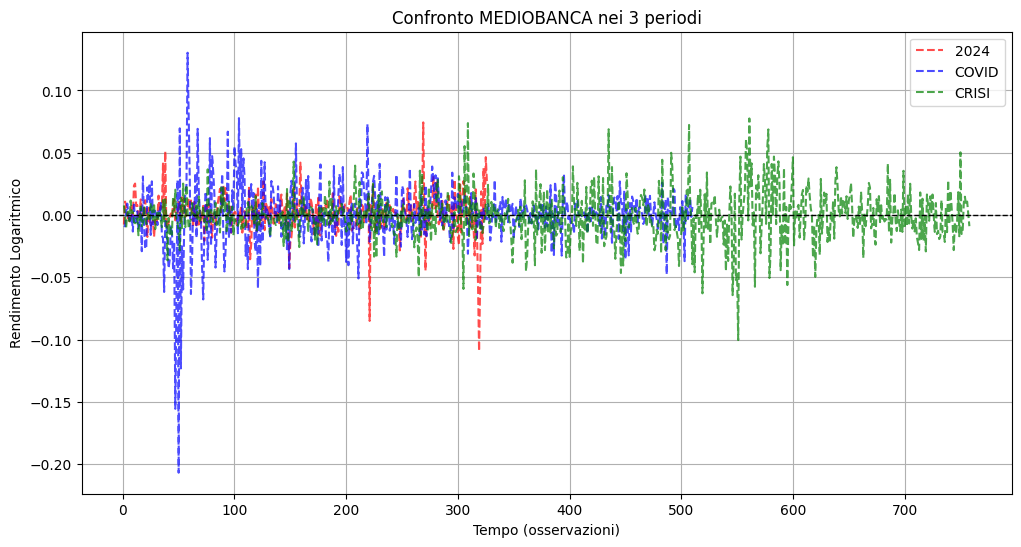

In [91]:
plt.figure(figsize=(12, 6))

# Plot dei 3 rendimenti logaritmici
plt.plot(range(len(stock['Log Return'])), stock['Log Return'], label='2024', linestyle='dashed', color='red', alpha=0.7)
plt.plot(range(len(stockCOVID['Log Return'])), stockCOVID['Log Return'], label='COVID', linestyle='dashed', color='blue', alpha=0.7)
plt.plot(range(len(stockCRISI['Log Return'])), stockCRISI['Log Return'], label='CRISI', linestyle='dashed', color='green', alpha=0.7)
#Uso range(len(...)) per l'asse x → così ogni serie viene plottata su una scala temporale relativa.
#Il codice mostra andamenti e volatilità dei tre periodi, anche se hanno lunghezze diverse

# Linea a 0
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Confronto MEDIOBANCA nei 3 periodi")
plt.xlabel("Tempo (osservazioni)")
plt.ylabel("Rendimento Logaritmico")
plt.legend()
plt.grid()
plt.show()



Indicatori di performance per ciascun periodo:
                   2024     COVID     CRISI
Media          0.001245  0.000148 -0.000804
Volatilità     0.015868  0.024692  0.018887
Sharpe Ratio   0.069136  0.004474 -0.051841
Sortino Ratio  0.077195  0.005068 -0.078976
Max Drawdown  -0.235632 -0.606649 -0.727402


<Figure size 1200x600 with 0 Axes>

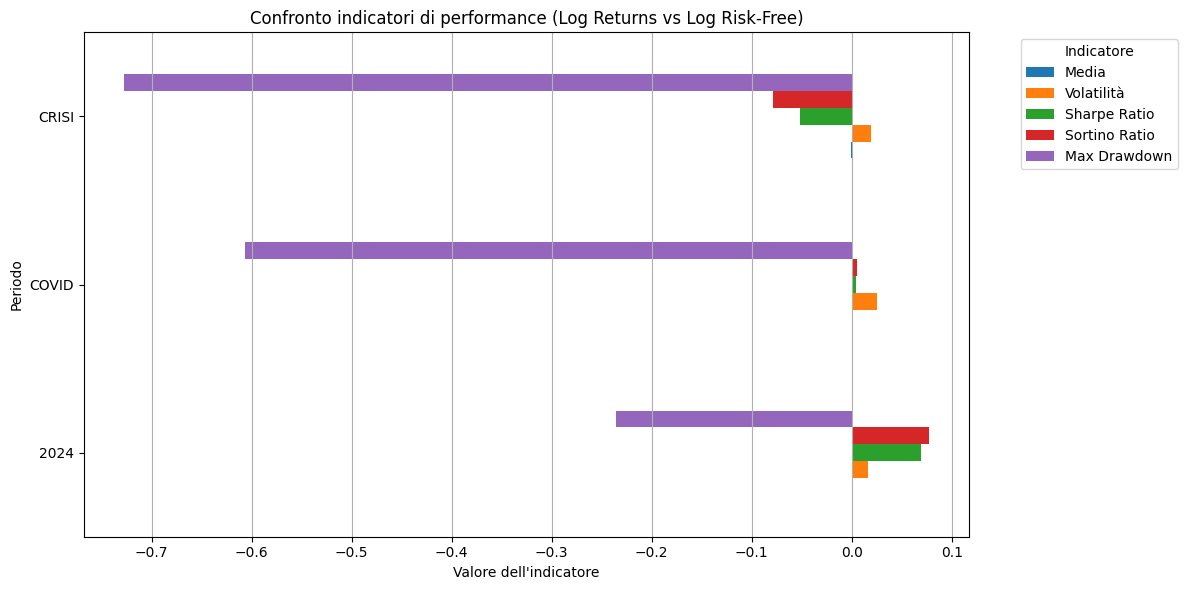

In [92]:
# === Step 1: definizione dei risk-free annuali ===
rf_2024_annual = 0.038     # BTP 2024
rf_covid_annual = 0.0095   # BTP 2020
rf_crisi_annual = 0.045    # BTP 2008

# === Step 2: conversione in log return giornalieri ===
def convert_risk_free_to_log_daily(rf_annual):
    return np.log(1 + rf_annual) / 252  # 252 giorni lavorativi

rf_2024 = convert_risk_free_to_log_daily(rf_2024_annual)
rf_covid = convert_risk_free_to_log_daily(rf_covid_annual)
rf_crisi = convert_risk_free_to_log_daily(rf_crisi_annual)

# === Step 3: funzione per calcolare gli indicatori ===
def calculate_indicators(returns, risk_free):
    mean_return = returns.mean()
    std_dev = returns.std()
    downside_std = returns[returns < 0].std()
    sharpe = (mean_return - risk_free) / std_dev if std_dev != 0 else np.nan
    sortino = (mean_return - risk_free) / downside_std if downside_std != 0 else np.nan
    cumulative = (returns + 1).cumprod()
    max_drawdown = (cumulative / cumulative.cummax() - 1).min()
    
    return {
        "Media": mean_return,
        "Volatilità": std_dev,
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Max Drawdown": max_drawdown
    }

# === Step 4: calcolo indicatori per ogni periodo ===
results = {
    "2024": calculate_indicators(stock["Log Return"], rf_2024),
    "COVID": calculate_indicators(stockCOVID["Log Return"], rf_covid),
    "CRISI": calculate_indicators(stockCRISI["Log Return"], rf_crisi)
}

# === Step 5: trasformazione in DataFrame ===
df_indicators = pd.DataFrame(results)

# === Stampa della tabella degli indicatori ===
print("\nIndicatori di performance per ciascun periodo:")
print(df_indicators.round(6))  # opzionale: limita le cifre decimali

# === Step 6: grafico a barre orizzontali ===
df_plot = df_indicators.T  # righe = periodi

plt.figure(figsize=(12, 6))
df_plot.plot(kind='barh', figsize=(12, 6))
plt.title("Confronto indicatori di performance (Log Returns vs Log Risk-Free)")
plt.xlabel("Valore dell'indicatore")
plt.ylabel("Periodo")
plt.grid(axis='x')
plt.legend(title="Indicatore", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#reminder Sortino: Il Sortino Ratio migliora lo Sharpe nei casi in cui la volatilità positiva (buoni rendimenti) non deve penalizzare l'investimento.
#Risponde a questa domanda: “Quanto rendimento extra ottengo per ogni unità di rischio negativo (perdita)?”

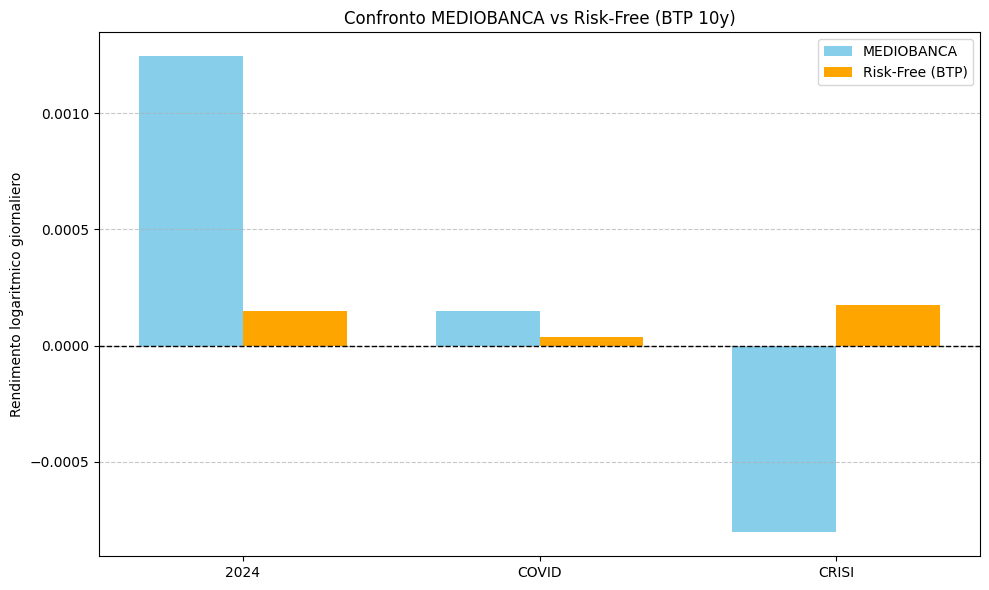

In [93]:
#lo step finale è assicurarsi che i calcoli del codice siano corretti. Per verificarlo, ho analizzato empiricamente i rendimenti medi di MedioBanca e del risk-free del periodo di riferimento. 
#il grafico conferma che l'analisi è stata eseguita correttamente. In sintesi, il risk-free risulta migliore del detenere azioni di MedioBanca solo durante la crisi del 2008. 

# Rendimento medio logaritmico giornaliero MEDIOBANCA (da dati reali)
mean_2024 = stock["Log Return"].mean()
mean_covid = stockCOVID["Log Return"].mean()
mean_crisi = stockCRISI["Log Return"].mean()

# Rendimento risk-free log giornaliero (già convertiti)
rf_2024 = np.log(1 + 0.038) / 252
rf_covid = np.log(1 + 0.0095) / 252
rf_crisi = np.log(1 + 0.045) / 252

# Prepara i dati
periodi = ["2024", "COVID", "CRISI"]
mediobanca_means = [mean_2024, mean_covid, mean_crisi]
risk_free = [rf_2024, rf_covid, rf_crisi]

# Larghezza barre
bar_width = 0.35
x = np.arange(len(periodi))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, mediobanca_means, bar_width, label="MEDIOBANCA", color="skyblue")
plt.bar(x + bar_width/2, risk_free, bar_width, label="Risk-Free (BTP)", color="orange")

# Aggiungi dettagli
plt.xticks(x, periodi)
plt.ylabel("Rendimento logaritmico giornaliero")
plt.title("Confronto MEDIOBANCA vs Risk-Free (BTP 10y)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [94]:

# === 1. Scarica dati FTSE MIB ===
ftsemib = yf.download('FTSEMIB.MI', start='2024-01-01', interval='1d', progress=False)
ftsemib['Log Return Market'] = np.log(ftsemib['Close'] / ftsemib['Close'].shift(1))
ftsemib = ftsemib[['Log Return Market']].dropna()

# ✅ Rimuovi eventuale MultiIndex
if isinstance(ftsemib.columns, pd.MultiIndex):
    ftsemib.columns = ftsemib.columns.get_level_values(0)

# ✅ Assicura che l'indice sia DateTimeIndex a livello singolo
ftsemib.index = pd.to_datetime(ftsemib.index)

# === 2. Usa i rendimenti già calcolati di Mediobanca ===
log_return_stock = stock['Log Return'].dropna()
log_return_stock.index = pd.to_datetime(log_return_stock.index)  # assicurati che sia DateTimeIndex

# === 3. Merge ===
df = pd.merge(
    log_return_stock.to_frame(name='stock_return'),
    ftsemib,
    left_index=True,
    right_index=True,
    how='inner'
)

# === 4. Regressione OLS ===
df.dropna(inplace=True)

if df.empty:
    print("⚠️ Nessun dato disponibile per la regressione.")
else:
    X = sm.add_constant(df['Log Return Market'])
    y = df['stock_return']
    model = sm.OLS(y, X).fit()
    beta = model.params['Log Return Market']
    alpha = model.params['const']

    print(f"✅ Beta di Mediobanca: {beta:.4f}")
    print(f"✅ Alpha: {alpha:.4f}")
    print(model.summary())

#Beta altamente significativo: il rendimento di Mediobanca è influenzato dall'andamento generale dell'indice
#Al contrario, alpha non è significativo: non viene dimostrato un extra-rendimento di Mediobanca rispetto al mercato 

✅ Beta di Mediobanca: 1.0974
✅ Alpha: 0.0007
                            OLS Regression Results                            
Dep. Variable:           stock_return   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     452.9
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.72e-63
Time:                        13:50:44   Log-Likelihood:                 1031.2
No. Observations:                 326   AIC:                            -2058.
Df Residuals:                     324   BIC:                            -2051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

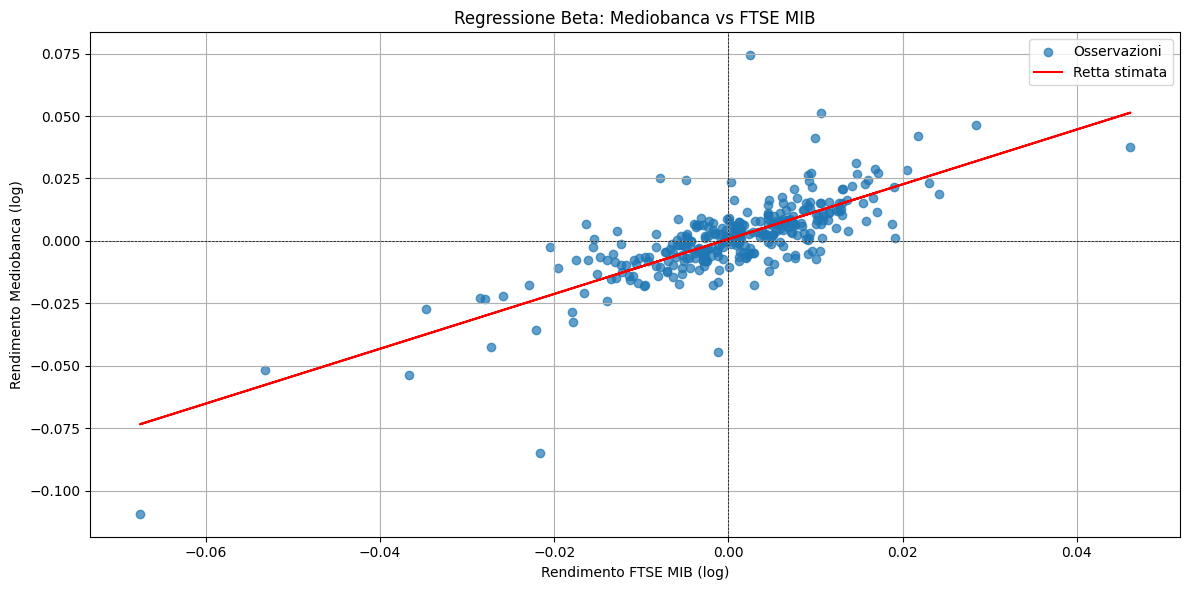

In [95]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Log Return Market'], df['stock_return'], alpha=0.7, label='Osservazioni') #NOMI DELLE VARIABILI
plt.plot(df['Log Return Market'], model.predict(X), color='red', label='Retta stimata')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Rendimento FTSE MIB (log)')
plt.ylabel('Rendimento Mediobanca (log)')
plt.title('Regressione Beta: Mediobanca vs FTSE MIB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


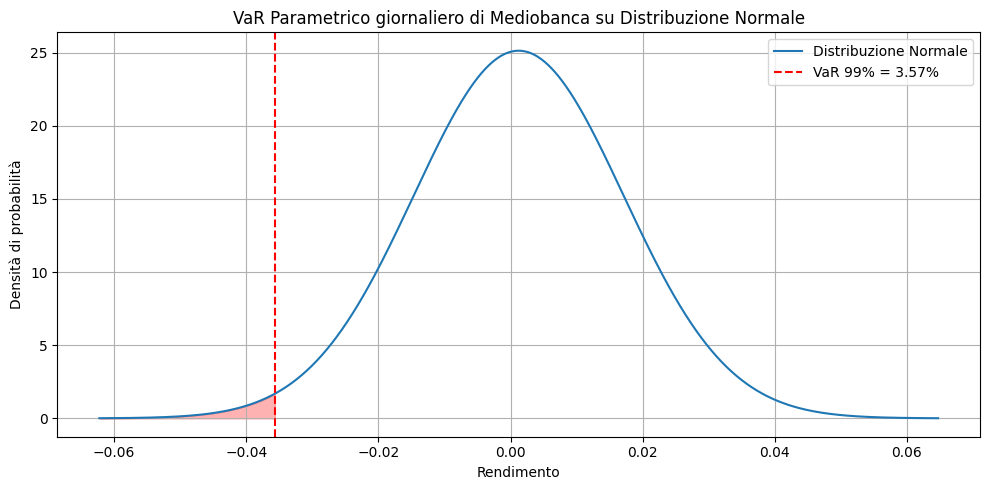

In [96]:
from scipy.stats import norm
std_dev = stock['Log Return'].std()
confidence_level = 0.99
z = norm.ppf(1 - confidence_level)
var = -(mean_2024 + z * std_dev)

#Genera curva gaussiana
x = np.linspace(mean_2024 - 4*std_dev, mean_return + 4*std_dev, 1000)
y = norm.pdf(x, mean_return, std_dev)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribuzione Normale')
plt.axvline(-var, color='red', linestyle='--', label=f'VaR {int(confidence_level*100)}% = {var:.2%}')
plt.fill_between(x, y, 0, where=(x <= -var), color='red', alpha=0.3)

plt.title('VaR Parametrico giornaliero di Mediobanca su Distribuzione Normale')
plt.xlabel('Rendimento')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📉 Expected Shortfall (ES) mensile a 99%: 4.1047%


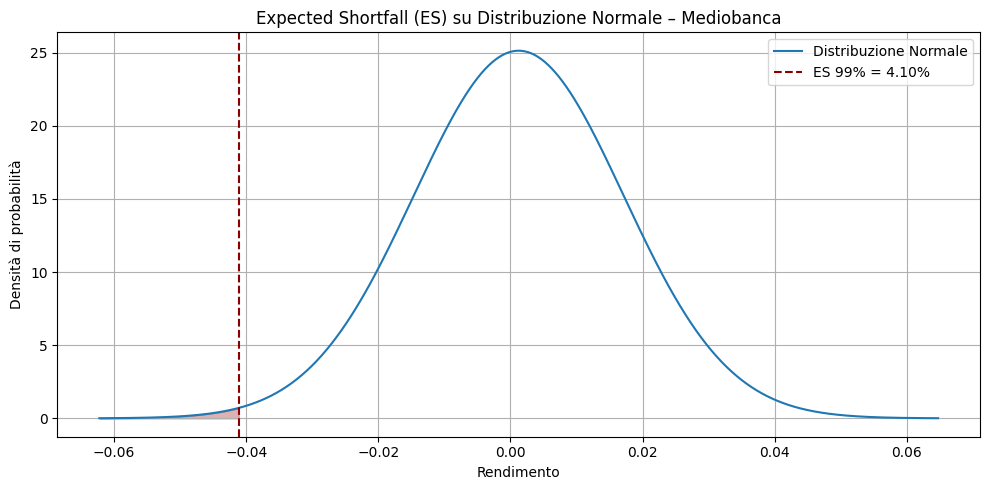

In [97]:
confidence_level = 0.99
start_date = '2024-01-01'

mu = mean_2024
sigma = std_dev

#Calcolo z-score e PDF per ES ===
z = norm.ppf(1 - confidence_level) #Z è il valore sulla normale per l'intervallo di confidenza: per il 95% vale 1.645
phi = norm.pdf(z) #

expected_shortfall = -(mu - sigma * (phi / (1 - confidence_level)))

print(f"📉 Expected Shortfall (ES) mensile a {int(confidence_level*100)}%: {expected_shortfall:.4%}")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10,5))
plt.plot(x, y, label='Distribuzione Normale')
plt.axvline(-expected_shortfall, color='darkred', linestyle='--', label=f'ES {int(confidence_level*100)}% = {expected_shortfall:.2%}')
plt.fill_between(x, y, 0, where=(x <= -expected_shortfall), color='darkred', alpha=0.3)

plt.title('Expected Shortfall (ES) su Distribuzione Normale – Mediobanca')
plt.xlabel('Rendimento')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()